In [0]:
!git clone https://github.com/titu1994/keras-coordconv.git
!cp keras-coordconv/coord.py coord.py

fatal: destination path 'keras-coordconv' already exists and is not an empty directory.


In [0]:
from keras import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import scipy
import random
from coord import CoordinateChannel2D

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

data_x = np.load('/content/gdrive/My Drive/1 to 8 2000/x_dataset.pkl')
data_y = np.load('/content/gdrive/My Drive/1 to 8 2000/y_dataset.pkl')

data_x = np.array(data_x)
data_y = np.array(data_y)

print(data_y[88][2])
print(np.shape(data_y))

[15.2 15. ]
(16000,)


We first need to turn the coordinates to images that can be fed into  a CNN

In [0]:
import os
# directory_x = "/content/gdrive/My Drive/project_set/1 to 12 dataset 20000/x_data/"
# directory_y = "/content/gdrive/My Drive/project_set/1 to 12 dataset 20000/y_data/"

directory_x = "/1 to 12 dataset 20000/x_data/"
directory_y = "/1 to 12 dataset 20000/y_data/"

if not os.path.exists(directory_x):
    os.makedirs(directory_x)
    
if not os.path.exists(directory_y):
    os.makedirs(directory_y)

In [0]:
img_dataset_x = []
for n, state in enumerate(tqdm(data_x)):
#     image = np.random.normal(0, 0.05, (60,60))
    image = np.zeros((60,60))

    for point in state:
        x,y = point.astype(int)
        image[x][y] = 1
    img_dataset_x.append(image)
        
img_dataset_y = []
for n, state in enumerate(tqdm(data_y)):
#     image = np.random.normal(0, 0.05, (60,60))
    image = np.zeros((60,60))
    for point in state:
        x,y = point.astype(int)
        image[x][y] = 1
    img_dataset_y.append(image)


# img_dataset_x = []
# for n, state in enumerate(tqdm(data_x)):
#     image = np.zeros((58,58))
#     for point in state:
#         x,y = point.astype(int)
#         image[x][y] = 1
#     np.save(directory_x+str(n)+'.np', image)
        
# img_dataset_y = []
# for n, state in enumerate(tqdm(data_y)):
#     image = np.zeros((58,58))
#     for point in state:
#         x,y = point.astype(int)
#         image[x][y] = 1
#     np.save(directory_y+str(n)+'.np', image)

In [0]:
# print(img_dataset_y[0])
# print(np.shape(img_dataset_x))

x_train = np.array(img_dataset_x)
y_train = np.array(img_dataset_y)

x_train = x_train.reshape(-1,60,60,1)
y_train = y_train.reshape(-1,60,60,1)


In [0]:
# imgplot = plt.imshow(img_dataset_x[5])

In [0]:
# imgplot = plt.imshow(img_dataset_y[5])

now that our points are in image form we must proceed with the machine learnig phase

In [0]:
class DnCNN():
     def __init__(self, n_features, n_conv, channels):
        self.kernel_size = (5,5)
        layer_list = []
        layer_list.append(CoordinateChannel2D())
        layer_list.append(layers.Conv2D(n_features, self.kernel_size, padding="same", activation="relu"))
        
        for _ in range(n_conv):            
            layer_list.append(layers.SeparableConv2D(n_features, self.kernel_size, padding="same"))
            layer_list.append(layers.BatchNormalization())
            layer_list.append(layers.Activation("relu"))
        
        image_input = layers.Input(shape=(None, None, channels))
        x = image_input
        
        for layer in layer_list:
            x = layer(x)
    
        output_img = layers.Conv2D(channels, self.kernel_size, padding="same")(x)
        output_img = layers.Activation("sigmoid")(output_img)
        self.model = Model(image_input, output_img)
        
        

In [0]:
def run_test():
    test_img_idx = index = random.randint(0,len(img_dataset_x)-1)
    
    test = model.model.predict(x_train[test_img_idx].reshape((-1, 60, 60, 1)))
    
    
    plt.imshow(img_dataset_x[test_img_idx])
    plt.show()
    
    plt.imshow(test.reshape(60, 60))
    plt.show()
    
    plt.imshow(img_dataset_y[test_img_idx])
    plt.show()
    
    
class TestCallback(callbacks.Callback):
    def __init__(self):
        pass

    def on_epoch_end(self, epoch, logs={}):
        if epoch % 10 == 0:
            run_test()

In [0]:
model = DnCNN(2, 2, 1)
# model.model.summary()
model.model.compile(optimizer=optimizers.RMSprop(), loss = losses.binary_crossentropy, metrics=['mse', 'accuracy'])

Epoch 1/50
16000/16000 [==============================] - 10s 615us/step - loss: 0.5045 - mean_squared_error: 0.1601 - acc: 0.9206


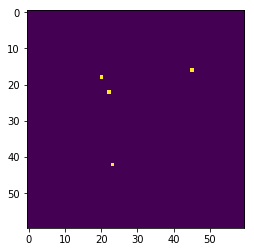

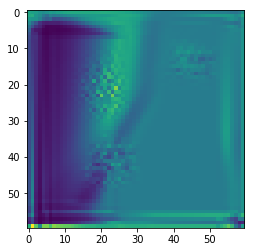

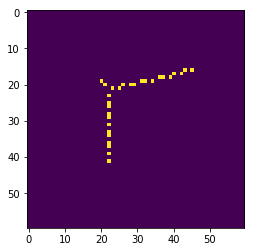

Epoch 2/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.3566 - mean_squared_error: 0.0954 - acc: 0.9807
Epoch 3/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.2762 - mean_squared_error: 0.0649 - acc: 0.9876
Epoch 4/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.2118 - mean_squared_error: 0.0427 - acc: 0.9885
Epoch 5/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.1544 - mean_squared_error: 0.0264 - acc: 0.9887
Epoch 6/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.1144 - mean_squared_error: 0.0179 - acc: 0.9888
Epoch 7/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0907 - mean_squared_error: 0.0142 - acc: 0.9888
Epoch 8/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0763 - mean_squared_error: 0.0126 - acc: 0.9888
Epoch 9/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0674 - m

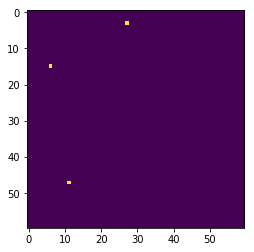

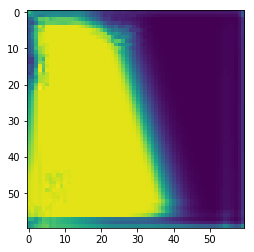

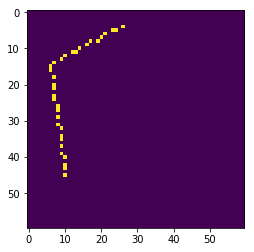

Epoch 12/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0568 - mean_squared_error: 0.0110 - acc: 0.9888
Epoch 13/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0560 - mean_squared_error: 0.0109 - acc: 0.9888
Epoch 14/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0552 - mean_squared_error: 0.0109 - acc: 0.9888
Epoch 15/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0550 - mean_squared_error: 0.0109 - acc: 0.9888
Epoch 16/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0546 - mean_squared_error: 0.0108 - acc: 0.9888
Epoch 17/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0543 - mean_squared_error: 0.0108 - acc: 0.9888
Epoch 18/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0543 - mean_squared_error: 0.0108 - acc: 0.9888
Epoch 19/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.

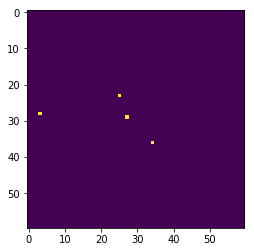

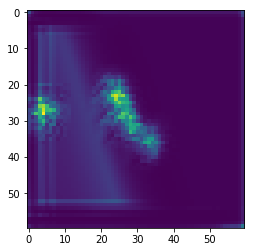

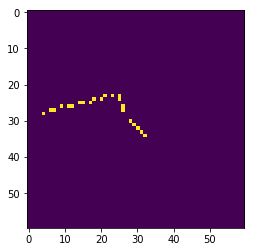

Epoch 22/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0535 - mean_squared_error: 0.0108 - acc: 0.9888
Epoch 23/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0531 - mean_squared_error: 0.0108 - acc: 0.9888
Epoch 24/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0529 - mean_squared_error: 0.0108 - acc: 0.9888
Epoch 25/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0524 - mean_squared_error: 0.0108 - acc: 0.9888
Epoch 26/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0521 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 27/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0521 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 28/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0520 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 29/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.

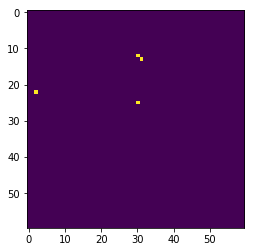

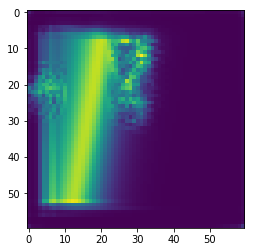

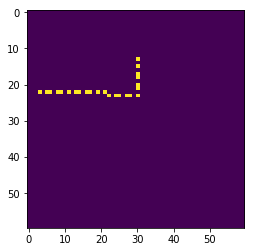

Epoch 32/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0515 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 33/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0512 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 34/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0510 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 35/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0511 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 36/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0513 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 37/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0510 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 38/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0506 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 39/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.

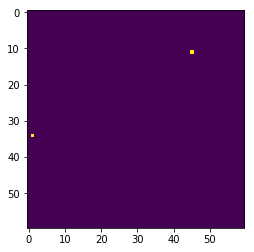

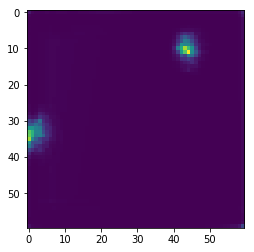

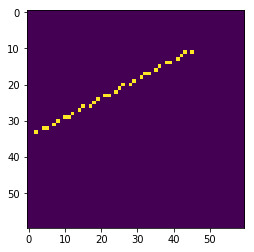

Epoch 42/50
16000/16000 [==============================] - 7s 462us/step - loss: 0.0506 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 43/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0505 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 44/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0503 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 45/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0504 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 46/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0503 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 47/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0503 - mean_squared_error: 0.0107 - acc: 0.9888
Epoch 48/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0501 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 49/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.

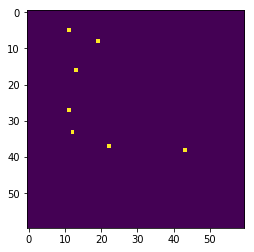

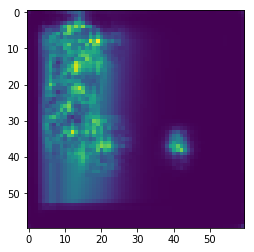

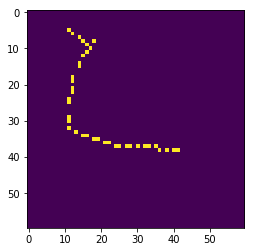

In [0]:
model.model.fit(x_train, y_train,
                shuffle=True,
          batch_size=1024,
          epochs=50,
          verbose=1, callbacks=[TestCallback()])
run_test()


Epoch 1/50
16000/16000 [==============================] - 7s 465us/step - loss: 0.0501 - mean_squared_error: 0.0106 - acc: 0.9888


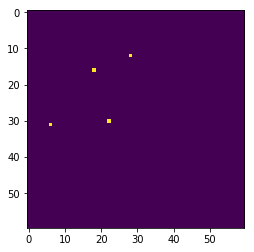

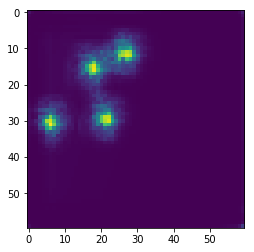

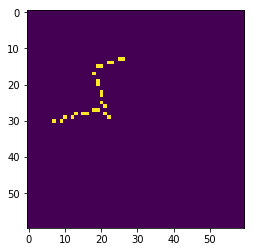

Epoch 2/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0500 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 3/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0500 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 4/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0500 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 5/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0500 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 6/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0500 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 7/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0499 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 8/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0499 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 9/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0498 - m

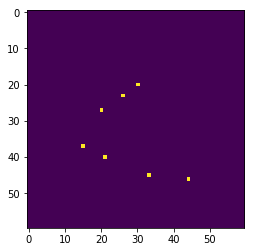

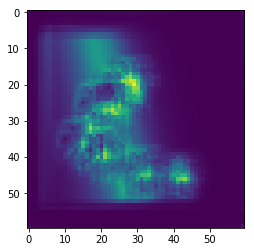

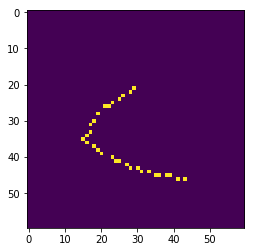

Epoch 12/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0499 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 13/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0498 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 14/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0497 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 15/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 16/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0497 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 17/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 18/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0497 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 19/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.

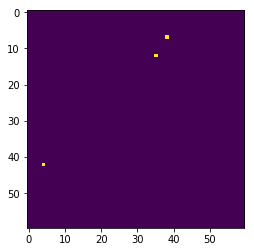

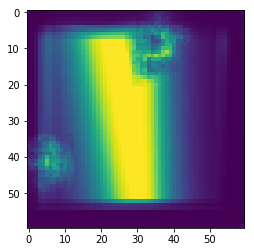

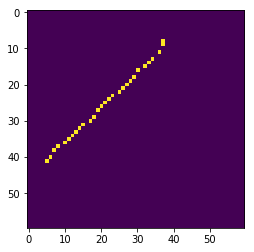

Epoch 22/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 23/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 24/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 25/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 26/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 27/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0495 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 28/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 29/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.

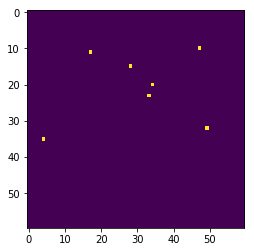

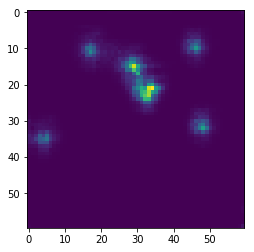

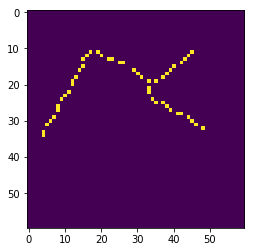

Epoch 32/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0495 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 33/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0495 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 34/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0494 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 35/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0496 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 36/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0495 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 37/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0495 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 38/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0494 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 39/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.

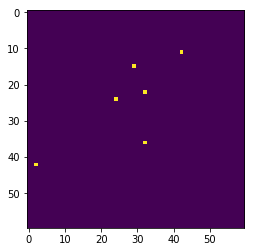

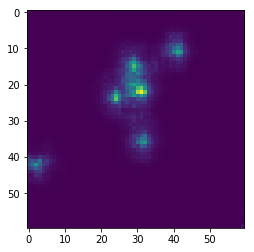

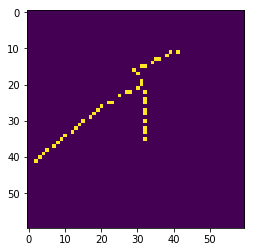

Epoch 42/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0494 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 43/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.0494 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 44/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0493 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 45/50
16000/16000 [==============================] - 7s 458us/step - loss: 0.0494 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 46/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0494 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 47/50
16000/16000 [==============================] - 7s 459us/step - loss: 0.0493 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 48/50
16000/16000 [==============================] - 7s 461us/step - loss: 0.0493 - mean_squared_error: 0.0106 - acc: 0.9888
Epoch 49/50
16000/16000 [==============================] - 7s 460us/step - loss: 0.

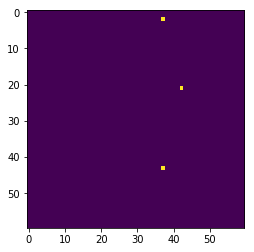

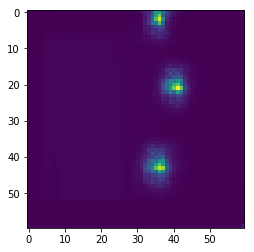

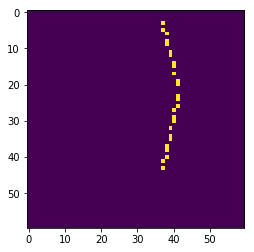

In [0]:
model.model.fit(x_train, y_train,
                shuffle=True,
          batch_size=1024,
          epochs=50,
          verbose=1, callbacks=[TestCallback()])
run_test()


In [0]:
sample = random.choice(x_train).reshape((-1, 60, 60, 1))


In [0]:
%%time
test = model.model.predict(sample)

CPU times: user 3.98 ms, sys: 2.3 ms, total: 6.28 ms
Wall time: 7.99 ms


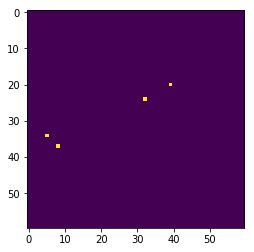

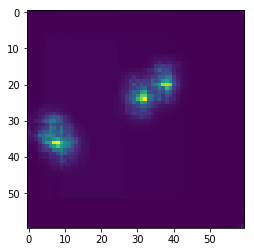

In [0]:
plt.imshow(sample.reshape(60, 60))
plt.show()


plt.imshow(test.reshape(60, 60))
plt.show()


In [0]:
model.model.summary()


In [0]:
plt.imshow(img_dataset_x[1])
plt.show()

plt.imshow(model.model.predict(img_dataset_x[1].reshape((-1, 60, 60, 1))).reshape(60, 60))
plt.show()

plt.imshow(img_dataset_y[1])
plt.show()
